In [55]:
import numpy as np
import scipy as sp
import pandas as pd
import missingno
from matplotlib import pyplot as plt

# missing values

In [3]:
dataframe = pd.read_csv('./data/p1_test.csv',index_col='id')
dataframe.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,grade,sub_grade,emp_title,emp_length,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
id,,,,,,,,,,,,,,,,,,,,,
0,NaN,20000,20000,20000.0,60 months,482.02,C,C5,Director Of Finance and Operations,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,7800,7800,7800.0,36 months,240.81,A,A2,Teacher,9 years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,5000,5000,5000.0,36 months,178.24,D,D3,truck driver,< 1 year,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,22800,22800,22800.0,36 months,812.77,D,D3,yard supervisor,8 years,...,NaN,NaN,Cash,Y,Jan-2018,COMPLETE,Oct-2017,3628.0,45.0,1.0
4,NaN,25000,25000,24950.0,60 months,585.61,C,C1,Associate Professor,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
pd.isna(dataframe)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,grade,sub_grade,emp_title,emp_length,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
id,,,,,,,,,,,,,,,,,,,,,
0,True,False,False,False,False,False,False,False,False,False,...,True,True,False,False,True,True,True,True,True,True
1,True,False,False,False,False,False,False,False,False,False,...,True,True,False,False,True,True,True,True,True,True
2,True,False,False,False,False,False,False,False,False,False,...,True,True,False,False,True,True,True,True,True,True
3,True,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,True,True,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226062,True,False,False,False,False,False,False,False,False,False,...,True,True,False,False,True,True,True,True,True,True
226063,True,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
226064,True,False,False,False,False,False,False,False,False,False,...,True,True,False,False,True,True,True,True,True,True


# 1. filter out nan and None data

In [7]:
# large portion of columns were dropped huge data lose
dataframe.dropna(axis=1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,hardship_flag,disbursement_method,debt_settlement_flag
id,,,,,,,,,,,,,,,,,,,,,
0,20000,20000,20000.0,60 months,482.02,C,C5,MORTGAGE,75000.0,Verified,...,6597.01,0.0,0.00,0.0000,482.02,1,Individual,N,Cash,N
1,7800,7800,7800.0,36 months,240.81,A,A2,RENT,49000.0,Not Verified,...,827.98,0.0,0.00,0.0000,240.81,1,Individual,N,Cash,N
2,5000,5000,5000.0,36 months,178.24,D,D3,RENT,18000.0,Source Verified,...,1335.24,0.0,0.00,0.0000,1532.20,1,Individual,N,Cash,N
3,22800,22800,22800.0,36 months,812.77,D,D3,RENT,60000.0,Verified,...,5861.02,0.0,3628.00,653.0400,812.77,1,Individual,N,Cash,Y
4,25000,25000,24950.0,60 months,585.61,C,C1,MORTGAGE,76000.0,Verified,...,10086.62,0.0,0.00,0.0000,584.90,1,Individual,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226062,16000,16000,16000.0,60 months,361.52,B,B5,RENT,70000.0,Not Verified,...,5423.95,0.0,0.00,0.0000,4432.51,1,Individual,N,Cash,N
226063,12000,12000,12000.0,60 months,307.93,D,D5,MORTGAGE,75000.0,Source Verified,...,916.42,0.0,1240.00,223.2000,307.93,1,Individual,N,Cash,Y
226064,24000,24000,24000.0,60 months,566.56,C,C5,MORTGAGE,65000.0,Source Verified,...,4932.54,0.0,4026.31,724.7358,566.56,1,Individual,N,Cash,N


In [8]:
# there isn't all columns missed rows
dataframe.dropna(axis=0,how='all')

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,grade,sub_grade,emp_title,emp_length,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
id,,,,,,,,,,,,,,,,,,,,,
0,NaN,20000,20000,20000.0,60 months,482.02,C,C5,Director Of Finance and Operations,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,7800,7800,7800.0,36 months,240.81,A,A2,Teacher,9 years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,5000,5000,5000.0,36 months,178.24,D,D3,truck driver,< 1 year,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,22800,22800,22800.0,36 months,812.77,D,D3,yard supervisor,8 years,...,NaN,NaN,Cash,Y,Jan-2018,COMPLETE,Oct-2017,3628.00,45.0,1.0
4,NaN,25000,25000,24950.0,60 months,585.61,C,C1,Associate Professor,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226062,NaN,16000,16000,16000.0,60 months,361.52,B,B5,Anderson Honda,2 years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
226063,NaN,12000,12000,12000.0,60 months,307.93,D,D5,Correction officer,10+ years,...,NaN,NaN,Cash,Y,Aug-2018,ACTIVE,Jul-2018,5463.55,45.0,14.0
226064,NaN,24000,24000,24000.0,60 months,566.56,C,C5,Processor,9 years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# lets try with column
# there are few columns with all nan drop them
dataframe_c = dataframe.dropna(axis=1,how='all')
dataframe_c

,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
id,,,,,,,,,,,,,,,,,,,,,
0,20000,20000,20000.0,60 months,482.02,C,C5,Director Of Finance and Operations,10+ years,MORTGAGE,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,7800,7800,7800.0,36 months,240.81,A,A2,Teacher,9 years,RENT,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,5000,5000,5000.0,36 months,178.24,D,D3,truck driver,< 1 year,RENT,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,22800,22800,22800.0,36 months,812.77,D,D3,yard supervisor,8 years,RENT,...,NaN,NaN,Cash,Y,Jan-2018,COMPLETE,Oct-2017,3628.00,45.0,1.0
4,25000,25000,24950.0,60 months,585.61,C,C1,Associate Professor,10+ years,MORTGAGE,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226062,16000,16000,16000.0,60 months,361.52,B,B5,Anderson Honda,2 years,RENT,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
226063,12000,12000,12000.0,60 months,307.93,D,D5,Correction officer,10+ years,MORTGAGE,...,NaN,NaN,Cash,Y,Aug-2018,ACTIVE,Jul-2018,5463.55,45.0,14.0
226064,24000,24000,24000.0,60 months,566.56,C,C5,Processor,9 years,MORTGAGE,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# drop columns with more than 40% na values
dataframe_c = dataframe_c.dropna(axis=1,thresh=135640)
dataframe_c

,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
id,,,,,,,,,,,,,,,,,,,,,
0,20000,20000,20000.0,60 months,482.02,C,C5,Director Of Finance and Operations,10+ years,MORTGAGE,...,0.0,0.0,0.0,23700.0,4517.0,14600.0,0.0,N,Cash,N
1,7800,7800,7800.0,36 months,240.81,A,A2,Teacher,9 years,RENT,...,25.0,0.0,0.0,65940.0,22452.0,19300.0,37640.0,N,Cash,N
2,5000,5000,5000.0,36 months,178.24,D,D3,truck driver,< 1 year,RENT,...,100.0,0.0,0.0,9666.0,5187.0,5100.0,0.0,N,Cash,N
3,22800,22800,22800.0,36 months,812.77,D,D3,yard supervisor,8 years,RENT,...,100.0,0.0,0.0,58714.0,36076.0,7400.0,51314.0,N,Cash,Y
4,25000,25000,24950.0,60 months,585.61,C,C1,Associate Professor,10+ years,MORTGAGE,...,66.7,0.0,0.0,216631.0,46157.0,40300.0,26331.0,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226062,16000,16000,16000.0,60 months,361.52,B,B5,Anderson Honda,2 years,RENT,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,Cash,N
226063,12000,12000,12000.0,60 months,307.93,D,D5,Correction officer,10+ years,MORTGAGE,...,42.9,0.0,0.0,188123.0,51554.0,26700.0,32123.0,N,Cash,Y
226064,24000,24000,24000.0,60 months,566.56,C,C5,Processor,9 years,MORTGAGE,...,33.3,1.0,2.0,127991.0,87689.0,32000.0,92991.0,N,Cash,N


In [16]:
# drop all columns na rows now
# so there weren't this kind of rows
dataframe_c.dropna(axis=0,how='all')

,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
id,,,,,,,,,,,,,,,,,,,,,
0,20000,20000,20000.0,60 months,482.02,C,C5,Director Of Finance and Operations,10+ years,MORTGAGE,...,0.0,0.0,0.0,23700.0,4517.0,14600.0,0.0,N,Cash,N
1,7800,7800,7800.0,36 months,240.81,A,A2,Teacher,9 years,RENT,...,25.0,0.0,0.0,65940.0,22452.0,19300.0,37640.0,N,Cash,N
2,5000,5000,5000.0,36 months,178.24,D,D3,truck driver,< 1 year,RENT,...,100.0,0.0,0.0,9666.0,5187.0,5100.0,0.0,N,Cash,N
3,22800,22800,22800.0,36 months,812.77,D,D3,yard supervisor,8 years,RENT,...,100.0,0.0,0.0,58714.0,36076.0,7400.0,51314.0,N,Cash,Y
4,25000,25000,24950.0,60 months,585.61,C,C1,Associate Professor,10+ years,MORTGAGE,...,66.7,0.0,0.0,216631.0,46157.0,40300.0,26331.0,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226062,16000,16000,16000.0,60 months,361.52,B,B5,Anderson Honda,2 years,RENT,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,Cash,N
226063,12000,12000,12000.0,60 months,307.93,D,D5,Correction officer,10+ years,MORTGAGE,...,42.9,0.0,0.0,188123.0,51554.0,26700.0,32123.0,N,Cash,Y
226064,24000,24000,24000.0,60 months,566.56,C,C5,Processor,9 years,MORTGAGE,...,33.3,1.0,2.0,127991.0,87689.0,32000.0,92991.0,N,Cash,N


In [18]:
# drop rows with more than 40% na values
dataframe_c = dataframe_c.dropna(axis=0,thresh=60)
dataframe_c

,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
id,,,,,,,,,,,,,,,,,,,,,
0,20000,20000,20000.0,60 months,482.02,C,C5,Director Of Finance and Operations,10+ years,MORTGAGE,...,0.0,0.0,0.0,23700.0,4517.0,14600.0,0.0,N,Cash,N
1,7800,7800,7800.0,36 months,240.81,A,A2,Teacher,9 years,RENT,...,25.0,0.0,0.0,65940.0,22452.0,19300.0,37640.0,N,Cash,N
2,5000,5000,5000.0,36 months,178.24,D,D3,truck driver,< 1 year,RENT,...,100.0,0.0,0.0,9666.0,5187.0,5100.0,0.0,N,Cash,N
3,22800,22800,22800.0,36 months,812.77,D,D3,yard supervisor,8 years,RENT,...,100.0,0.0,0.0,58714.0,36076.0,7400.0,51314.0,N,Cash,Y
4,25000,25000,24950.0,60 months,585.61,C,C1,Associate Professor,10+ years,MORTGAGE,...,66.7,0.0,0.0,216631.0,46157.0,40300.0,26331.0,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226061,12000,12000,12000.0,36 months,386.82,B,B2,NaN,NaN,MORTGAGE,...,80.0,0.0,0.0,145424.0,25426.0,13200.0,18500.0,N,Cash,N
226063,12000,12000,12000.0,60 months,307.93,D,D5,Correction officer,10+ years,MORTGAGE,...,42.9,0.0,0.0,188123.0,51554.0,26700.0,32123.0,N,Cash,Y
226064,24000,24000,24000.0,60 months,566.56,C,C5,Processor,9 years,MORTGAGE,...,33.3,1.0,2.0,127991.0,87689.0,32000.0,92991.0,N,Cash,N


In [28]:
# examine how much of data missing by each column
mask = pd.DataFrame(dataframe_c.isna().sum(),columns=['null count'])
mask['null prec.'] = (mask['null count']/dataframe_c.shape[0])*100
mask

,null count,null prec.
loan_amnt,0,0.000000
funded_amnt,0,0.000000
funded_amnt_inv,0,0.000000
term,0,0.000000
installment,0,0.000000
grade,0,0.000000
sub_grade,0,0.000000
emp_title,16325,7.389452
emp_length,14490,6.558846
home_ownership,0,0.000000


In [29]:
pd.options.display.max_rows = 100
mask

,null count,null prec.
loan_amnt,0,0.000000
funded_amnt,0,0.000000
funded_amnt_inv,0,0.000000
term,0,0.000000
installment,0,0.000000
grade,0,0.000000
sub_grade,0,0.000000
emp_title,16325,7.389452
emp_length,14490,6.558846
home_ownership,0,0.000000


<Figure size 4800x7200 with 0 Axes>

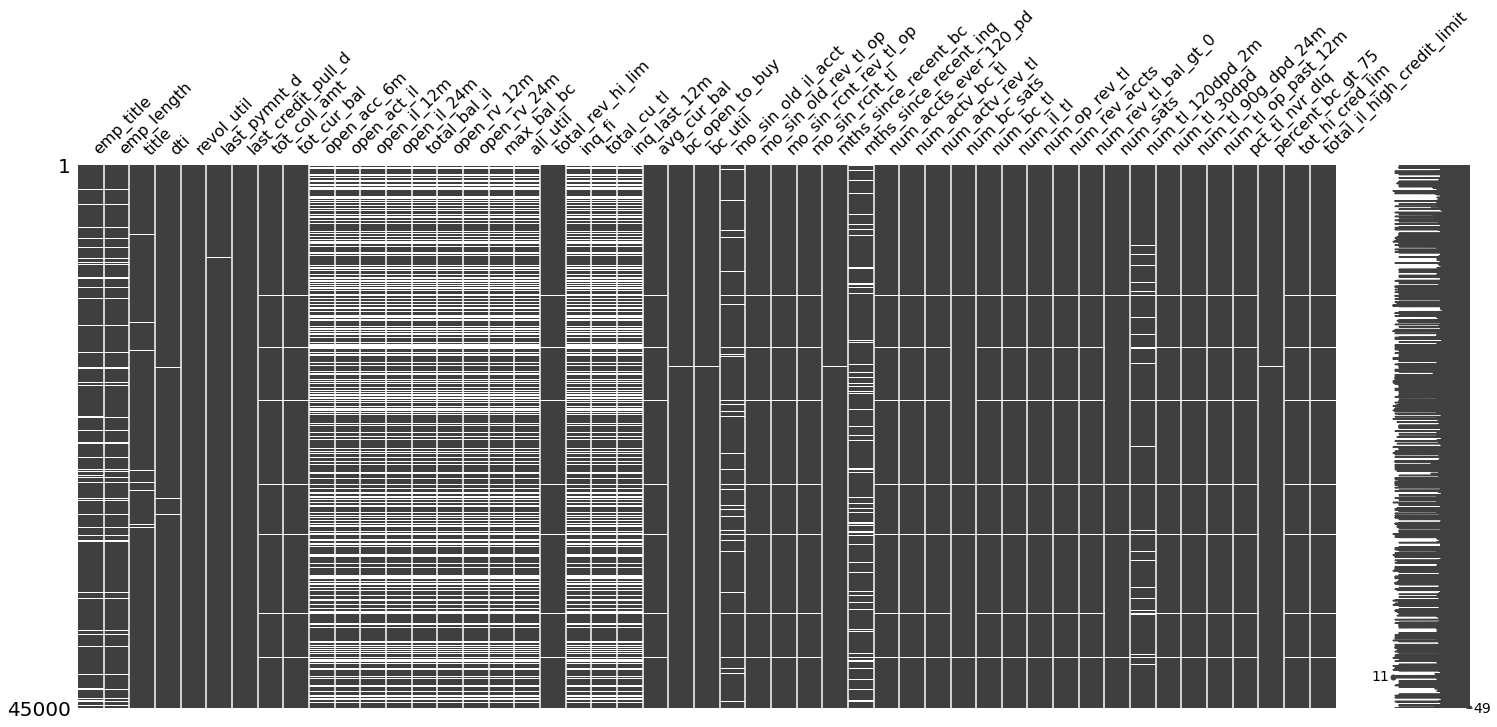

In [37]:
nullable_col = dataframe_c.columns[dataframe_c.isna().any()].tolist()

plt.figure(figsize=[24,36],dpi=200)
missingno.matrix(dataframe_c[nullable_col].sample(45000))
plt.show()

In [41]:
mask[mask['null prec.'] > 0.0].sort_values(by='null prec.',ascending=False)

,null count,null prec.
all_util,81424,36.856280
inq_fi,81402,36.846322
open_acc_6m,81402,36.846322
open_rv_24m,81402,36.846322
open_rv_12m,81402,36.846322
total_bal_il,81402,36.846322
open_il_24m,81402,36.846322
open_il_12m,81402,36.846322
open_act_il,81402,36.846322
max_bal_bc,81402,36.846322


# filling missing values

In [49]:
dataframe_c[nullable_col].dtypes

emp_title                      object
emp_length                     object
title                          object
dti                           float64
revol_util                    float64
last_pymnt_d                   object
last_credit_pull_d             object
tot_coll_amt                  float64
tot_cur_bal                   float64
open_acc_6m                   float64
open_act_il                   float64
open_il_12m                   float64
open_il_24m                   float64
total_bal_il                  float64
open_rv_12m                   float64
open_rv_24m                   float64
max_bal_bc                    float64
all_util                      float64
total_rev_hi_lim              float64
inq_fi                        float64
total_cu_tl                   float64
inq_last_12m                  float64
avg_cur_bal                   float64
bc_open_to_buy                float64
bc_util                       float64
mo_sin_old_il_acct            float64
mo_sin_old_r

In [53]:
# fill lowest column with median of column(because it has few na values)
LCPD_median = np.median(dataframe_c['revol_util'])
_ = dataframe_c['revol_util'].fillna(value=LCPD_median,inplace=True)
dataframe_c['revol_util'].isna().sum()

c:\users\ashen\appdata\local\programs\python\python37\lib\site-packages\pandas\core\series.py:4439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


157

# outlier detection

In [54]:
sample = dataframe_c[['loan_amnt']]
sample.head()

,loan_amnt
id,
0,20000
1,7800
2,5000
3,22800
4,25000


In [57]:
np.abs(sp.stats.zscore(sample))

array([[0.52501724],
       [0.79585798],
       [1.09900966],
       ...,
       [0.95809108],
       [1.06635954],
       [0.55766736]])

In [59]:
sample.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,220923.0,15150.783191,9236.321123,1000.0,8000.0,13000.0,20000.0,40000.0


In [61]:
# dummy features
dataframe_c.select_dtypes(include=np.object).columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type', 'hardship_flag',
       'disbursement_method', 'debt_settlement_flag'],
      dtype='object')

In [62]:
pd.get_dummies(dataframe_c['term'])

,36 months,60 months
id,,
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
226061,1,0
226063,0,1
226064,0,1
